In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

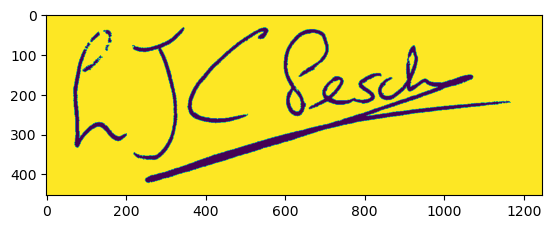

In [2]:
img = plt.imread('../input/handwritten-signatures/sample_Signature/sample_Signature/forged/NFI-00301001.png')
plt.imshow(img)

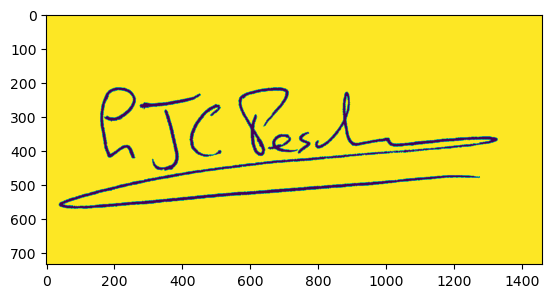

In [3]:
img1 = plt.imread('../input/handwritten-signatures/sample_Signature/sample_Signature/genuine/NFI-00101001.png')
plt.imshow(img1)

In [4]:
import glob
gen = [glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
       glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
       glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
       glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/real1/*.*')]
                 
forg = [glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]

In [5]:
# import glob
# import keras
import cv2


train_data = []
train_labels = []

test_data = []
test_labels = []

for data in range(len(gen)):
    for i in gen[data]:
        if data == 3:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(0)
        else:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(0) #genuine = 0
        
for data in range(len(forg)):
    for j in forg[data]:
        if data == 3:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(1)
        else:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(1) #forged = 1

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [6]:
train_data.shape

(540, 224, 224, 3)

In [7]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)

# CNN (CONVOLUTION NEURAL NETWORK)

### Relu Activation Function

In [8]:
pip install keras_preprocessing


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam
from keras.optimizers import RMSprop

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

def objective(x, y):
 return x**2.0 + y**2.0


network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
network.add(MaxPooling2D(3,3))

network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(2,2))

network.add(Flatten()) #NX1
network.add(Dense(128,activation = 'relu'))
network.add(Dropout(rate=0.3)) #143
network.add(Flatten()) #NX1
network.add(Dense(2,activation = 'softmax'))
network.add(Flatten()) #NX1

network.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [10]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 3
BS = 1
progess = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/3
513/513 [==============================] - 8s 5ms/step - loss: 7.6554 - accuracy: 0.5068 - val_loss: 7.6604 - val_accuracy: 0.4074
Epoch 2/3
513/513 [==============================] - 2s 4ms/step - loss: 7.6689 - accuracy: 0.5049 - val_loss: 7.6604 - val_accuracy: 0.4074
Epoch 3/3
513/513 [==============================] - 2s 4ms/step - loss: 7.6689 - accuracy: 0.5049 - val_loss: 7.6604 - val_accuracy: 0.4074


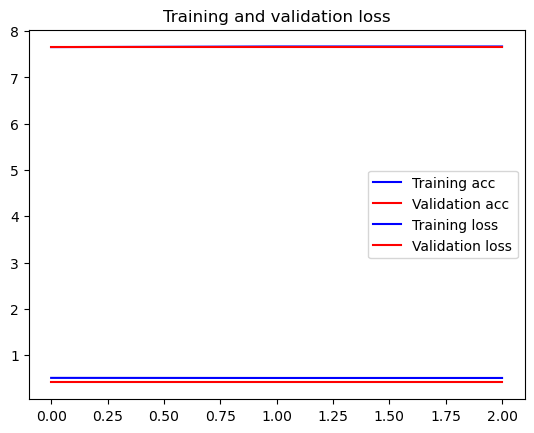

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [11]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [12]:
pred = network.predict(test_data)

6/6 [==============================] - 0s 27ms/step


In [13]:
pred  #prob of genuine, prob of forged

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

### SIGMOID ACTIVATION FUNCTION

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam
from keras.optimizers import RMSprop

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='sigmoid'))
network.add(MaxPooling2D(3,3))

network.add(Conv2D(32,(3,3),activation='sigmoid'))
network.add(MaxPooling2D(2,2))

network.add(Flatten()) #NX1
network.add(Dense(128,activation = 'sigmoid'))
network.add(Dropout(rate=0.3)) #143
network.add(Flatten()) #NX1

network.add(Dense(2,activation = 'softmax'))
network.add(Flatten()) #NX1

network.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 41472)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [16]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 3
BS = 1
progess = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/3
513/513 [==============================] - 3s 4ms/step - loss: 0.7831 - accuracy: 0.4951 - val_loss: 0.6935 - val_accuracy: 0.4074
Epoch 2/3
513/513 [==============================] - 2s 4ms/step - loss: 0.7163 - accuracy: 0.4737 - val_loss: 0.6943 - val_accuracy: 0.4074
Epoch 3/3
513/513 [==============================] - 2s 4ms/step - loss: 0.7022 - accuracy: 0.5185 - val_loss: 0.6932 - val_accuracy: 0.5926


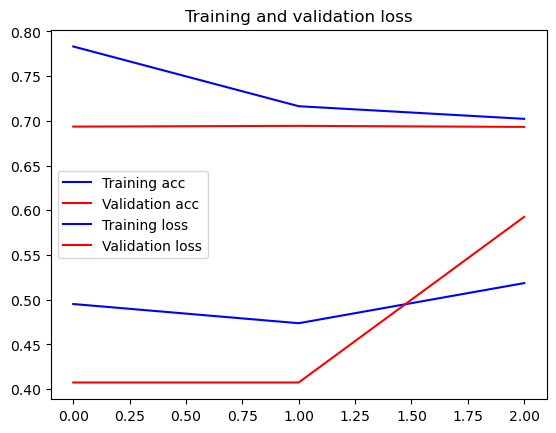

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [17]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [18]:
pred = network.predict(test_data)

6/6 [==============================] - 0s 22ms/step


In [19]:
pred  #prob of genuine, prob of forged

array([[0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.50401133, 0.4959887 ],
       [0.

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

### TANH ACTIVATION FUNCTION

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam
from keras.optimizers import RMSprop

def tanh(x):
    return np.tanh(x)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='tanh'))
network.add(MaxPooling2D(3,3))

network.add(Conv2D(32,(3,3),activation='tanh'))
network.add(MaxPooling2D(2,2))

network.add(Flatten()) #NX1
network.add(Dense(128,activation = 'tanh'))
network.add(Dropout(rate=0.3)) #143
network.add(Flatten()) #NX1

network.add(Dense(2,activation = 'softmax'))
network.add(Flatten()) #NX1

network.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 41472)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [22]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 4
BS = 1
progess = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/4
513/513 [==============================] - 3s 4ms/step - loss: 0.8938 - accuracy: 0.5166 - val_loss: 0.7013 - val_accuracy: 0.5926
Epoch 2/4
513/513 [==============================] - 2s 4ms/step - loss: 0.7875 - accuracy: 0.5029 - val_loss: 0.7024 - val_accuracy: 0.4074
Epoch 3/4
513/513 [==============================] - 2s 4ms/step - loss: 0.7392 - accuracy: 0.4386 - val_loss: 0.7283 - val_accuracy: 0.5926
Epoch 4/4
513/513 [==============================] - 2s 4ms/step - loss: 0.7169 - accuracy: 0.4971 - val_loss: 0.6998 - val_accuracy: 0.5926


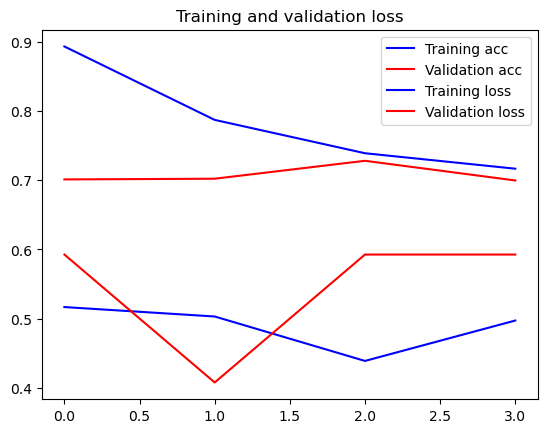

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [23]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [24]:
pred = network.predict(test_data)

6/6 [==============================] - 0s 15ms/step


In [25]:
pred

array([[0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

<hr>

# SIAMESE NEURAL NETWORK

## DISTANCES USED

* Euclidean Distance
* Manhattan Distance
* Hamming Distance
* Minkowski Distance


## **1. Using Euclidean Distance**

## SIGMOID ACTIVATION FUNCTION

In [27]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)

In [28]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 128)          5328800     ['input_2[0][0]',                
                                                                  'input_3[0][0]']          

In [29]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, concatenate


# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

#sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='sigmoid'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='sigmoid'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'sigmoid'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# define the distance metric function
def euclidean_distance(vectors):
    (featsA, featsB) = vectors
    sumSquared = K.sum(K.square(featsA - featsB), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sumSquared, K.epsilon()))


# define siamese model
def build_siamese_model(input_shape):
    left_input = Input(input_shape)
    right_input = Input(input_shape)

    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='sigmoid', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='sigmoid'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='sigmoid'))
    
    encoded_l = model(left_input)
    encoded_r = model(right_input)

    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])

    prediction = Dense(1, activation='sigmoid')(L1_distance)
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

    return siamese_net

# define the output layer
distance = Lambda(euclidean_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="sigmoid")(distance)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)


Epoch 1/10
5/5 [==============================] - 3s 167ms/step - loss: 0.7025 - accuracy: 0.4500 - val_loss: 0.6927 - val_accuracy: 0.6500
Epoch 2/10
5/5 [==============================] - 0s 44ms/step - loss: 0.6929 - accuracy: 0.5750 - val_loss: 0.6925 - val_accuracy: 0.6500
Epoch 3/10
5/5 [==============================] - 0s 52ms/step - loss: 0.6927 - accuracy: 0.5750 - val_loss: 0.6921 - val_accuracy: 0.6500
Epoch 4/10
5/5 [==============================] - 0s 43ms/step - loss: 0.6926 - accuracy: 0.5750 - val_loss: 0.6916 - val_accuracy: 0.6500
Epoch 5/10
5/5 [==============================] - 0s 52ms/step - loss: 0.6923 - accuracy: 0.5750 - val_loss: 0.6913 - val_accuracy: 0.6500
Epoch 6/10
5/5 [==============================] - 0s 51ms/step - loss: 0.6922 - accuracy: 0.5750 - val_loss: 0.6909 - val_accuracy: 0.6500
Epoch 7/10
5/5 [==============================] - 0s 43ms/step - loss: 0.6920 - accuracy: 0.5750 - val_loss: 0.6906 - val_accuracy: 0.6500
Epoch 8/10
5/5 [==========

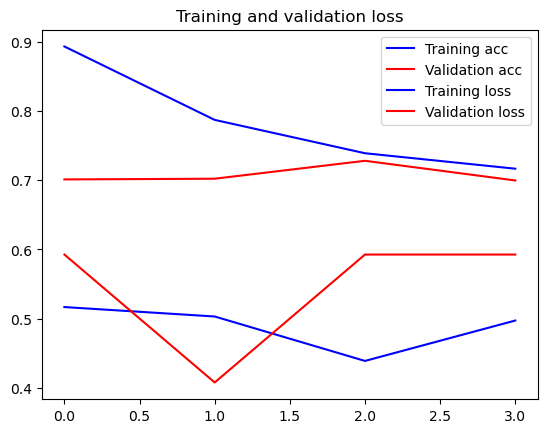

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [30]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [31]:
pred = network.predict(test_data)

6/6 [==============================] - 0s 12ms/step


In [32]:
pred

array([[0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

## RELU ACTIVATION FUNCTION 

In [34]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_3 (Functional)           (None, 128)          5328800     ['input_7[0][0]',                
                                                                  'input_8[0][0]']          

In [35]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, concatenate


# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

#sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='relu'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'relu'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# define the distance metric function
def euclidean_distance(vectors):
    (featsA, featsB) = vectors
    sumSquared = K.sum(K.square(featsA - featsB), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sumSquared, K.epsilon()))


# define siamese model
def build_siamese_model(input_shape):
    left_input = Input(input_shape)
    right_input = Input(input_shape)

    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    
    encoded_l = model(left_input)
    encoded_r = model(right_input)

    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])

    prediction = Dense(1, activation='relu')(L1_distance)
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

    return siamese_net

# define the output layer
distance = Lambda(euclidean_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="relu")(distance)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)


Epoch 1/10
5/5 [==============================] - 3s 203ms/step - loss: 7.0107 - accuracy: 0.4375 - val_loss: 1.5077 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 0s 38ms/step - loss: 8.9891 - accuracy: 0.4000 - val_loss: 1.5083 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 0s 49ms/step - loss: 8.9589 - accuracy: 0.4125 - val_loss: 1.4987 - val_accuracy: 0.5000
Epoch 4/10
5/5 [==============================] - 0s 39ms/step - loss: 8.9589 - accuracy: 0.4125 - val_loss: 1.4754 - val_accuracy: 0.5000
Epoch 5/10
5/5 [==============================] - 0s 39ms/step - loss: 8.9589 - accuracy: 0.4125 - val_loss: 1.4570 - val_accuracy: 0.5000
Epoch 6/10
5/5 [==============================] - 0s 38ms/step - loss: 8.9589 - accuracy: 0.4125 - val_loss: 1.4454 - val_accuracy: 0.5000
Epoch 7/10
5/5 [==============================] - 0s 40ms/step - loss: 8.9589 - accuracy: 0.4125 - val_loss: 1.4371 - val_accuracy: 0.5000
Epoch 8/10
5/5 [==========

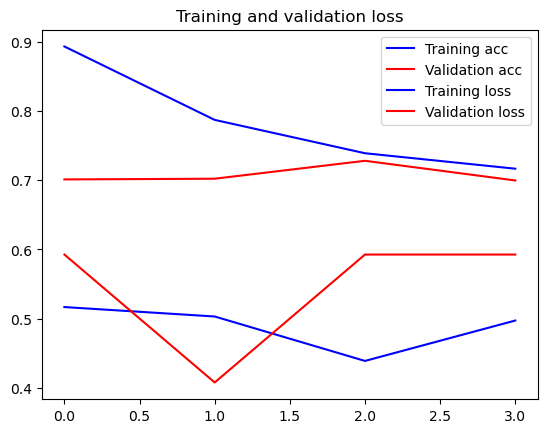

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [36]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [37]:
pred = network.predict(test_data)

6/6 [==============================] - 0s 14ms/step


In [38]:
pred

array([[0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

## **2. Using Manhattan Distance**

## Using RELU Activation Function

In [40]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_13 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_6 (Functional)           (None, 128)          5328800     ['input_12[0][0]',               
                                                                  'input_13[0][0]']         

In [41]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, concatenate


# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

#sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='relu'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'relu'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# define the distance metric function
def manhattan_distance(vectors):
    (featsA, featsB) = vectors
    return K.sum(K.abs(featsA - featsB), axis=1, keepdims=True)


# define siamese model
def build_siamese_model(input_shape):
    left_input = Input(input_shape)
    right_input = Input(input_shape)

    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    
    encoded_l = model(left_input)
    encoded_r = model(right_input)

    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])

    prediction = Dense(1, activation='relu')(L1_distance)
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

    return siamese_net

# define the output layer
distance = Lambda(manhattan_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="relu")(distance)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)


Epoch 1/10
5/5 [==============================] - 2s 88ms/step - loss: 6.5556 - accuracy: 0.5750 - val_loss: 9.2550 - val_accuracy: 0.4000
Epoch 2/10
5/5 [==============================] - 0s 48ms/step - loss: 6.5556 - accuracy: 0.5750 - val_loss: 9.2550 - val_accuracy: 0.4000
Epoch 3/10
5/5 [==============================] - 0s 38ms/step - loss: 6.5556 - accuracy: 0.5750 - val_loss: 9.2550 - val_accuracy: 0.4000
Epoch 4/10
5/5 [==============================] - 0s 38ms/step - loss: 6.5556 - accuracy: 0.5750 - val_loss: 9.2550 - val_accuracy: 0.4000
Epoch 5/10
5/5 [==============================] - 0s 37ms/step - loss: 6.5556 - accuracy: 0.5750 - val_loss: 9.2550 - val_accuracy: 0.4000
Epoch 6/10
5/5 [==============================] - 0s 36ms/step - loss: 6.5556 - accuracy: 0.5750 - val_loss: 9.2550 - val_accuracy: 0.4000
Epoch 7/10
5/5 [==============================] - 0s 39ms/step - loss: 6.5556 - accuracy: 0.5750 - val_loss: 9.2550 - val_accuracy: 0.4000
Epoch 8/10
5/5 [===========

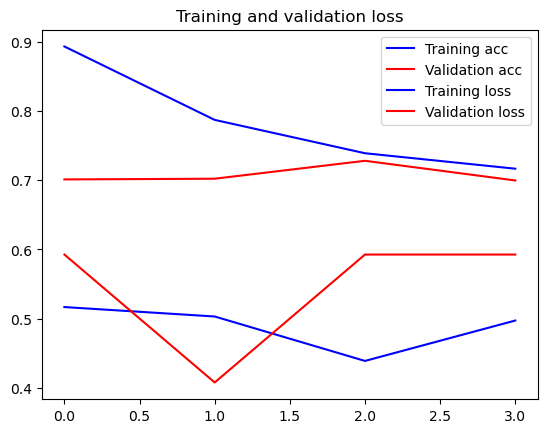

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [42]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [43]:
pred = network.predict(test_data)

6/6 [==============================] - 0s 14ms/step


In [44]:
pred

array([[0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

## Using SIGMOID Activation Function

In [46]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='sigmoid')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='sigmoid')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='sigmoid')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_18 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_9 (Functional)           (None, 128)          5328800     ['input_17[0][0]',               
                                                                  'input_18[0][0]']        

In [47]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, concatenate


# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

#sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='sigmoid'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='sigmoid'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'sigmoid'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# define the distance metric function
def manhattan_distance(vectors):
    (featsA, featsB) = vectors
    return K.sum(K.abs(featsA - featsB), axis=1, keepdims=True)


# define siamese model
def build_siamese_model(input_shape):
    left_input = Input(input_shape)
    right_input = Input(input_shape)

    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='sigmoid', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='sigmoid'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='sigmoid'))
    
    encoded_l = model(left_input)
    encoded_r = model(right_input)

    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])

    prediction = Dense(1, activation='sigmoid')(L1_distance)
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

    return siamese_net

# define the output layer
distance = Lambda(manhattan_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="sigmoid")(distance)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)


Epoch 1/10
5/5 [==============================] - 2s 97ms/step - loss: 2.2734 - accuracy: 0.5500 - val_loss: 0.6939 - val_accuracy: 0.3000
Epoch 2/10
5/5 [==============================] - 0s 52ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6944 - val_accuracy: 0.3000
Epoch 3/10
5/5 [==============================] - 0s 42ms/step - loss: 0.6930 - accuracy: 0.5250 - val_loss: 0.6947 - val_accuracy: 0.3000
Epoch 4/10
5/5 [==============================] - 0s 44ms/step - loss: 0.6930 - accuracy: 0.5250 - val_loss: 0.6949 - val_accuracy: 0.3000
Epoch 5/10
5/5 [==============================] - 0s 42ms/step - loss: 0.6929 - accuracy: 0.5250 - val_loss: 0.6950 - val_accuracy: 0.3000
Epoch 6/10
5/5 [==============================] - 0s 41ms/step - loss: 0.6929 - accuracy: 0.5250 - val_loss: 0.6952 - val_accuracy: 0.3000
Epoch 7/10
5/5 [==============================] - 0s 52ms/step - loss: 0.6929 - accuracy: 0.5250 - val_loss: 0.6953 - val_accuracy: 0.3000
Epoch 8/10
5/5 [===========

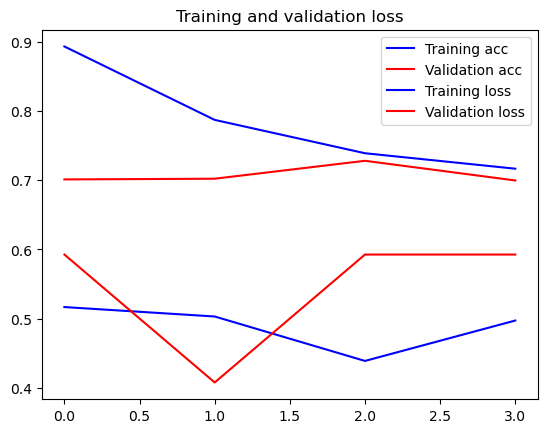

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [48]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [49]:
pred = network.predict(test_data)

6/6 [==============================] - 0s 13ms/step


In [50]:
pred

array([[0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.

In [51]:
from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_recall_fscore_support
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

In [52]:
from sklearn.metrics import precision_recall_fscore_support

# calculate precision, recall, and F1 score
precision, recall, f1score, _ = precision_recall_fscore_support(test_labels, pred.argmax(axis=1), average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1score)

Precision:  0.25
Recall:  0.5
F1 Score:  0.3333333333333333


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **3. Using Hamming Distance**

## Using RELU Activation Function

In [53]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()


Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_22 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_23 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_12 (Functional)          (None, 128)          5328800     ['input_22[0][0]',               
                                                                  'input_23[0][0]']        

In [54]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np
import binascii
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)


# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='relu'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'relu'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

@tf.function
def hamming_distance(vectors):
    (featsA, featsB) = vectors
    return K.sum(K.abs(featsA - featsB), axis=1, keepdims=True)

# define the output layer
distance = Lambda(hamming_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="relu")(distance)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)


Epoch 1/10


/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


5/5 [==============================] - 1s 107ms/step - loss: 8.6765 - accuracy: 0.4375 - val_loss: 10.0262 - val_accuracy: 0.3500
Epoch 2/10
5/5 [==============================] - 0s 88ms/step - loss: 8.6765 - accuracy: 0.4375 - val_loss: 10.0262 - val_accuracy: 0.3500
Epoch 3/10
5/5 [==============================] - 1s 110ms/step - loss: 8.6765 - accuracy: 0.4375 - val_loss: 10.0262 - val_accuracy: 0.3500
Epoch 4/10
5/5 [==============================] - 1s 111ms/step - loss: 8.6765 - accuracy: 0.4375 - val_loss: 10.0262 - val_accuracy: 0.3500
Epoch 5/10
5/5 [==============================] - 0s 104ms/step - loss: 8.6765 - accuracy: 0.4375 - val_loss: 10.0262 - val_accuracy: 0.3500
Epoch 6/10
5/5 [==============================] - 0s 92ms/step - loss: 8.6765 - accuracy: 0.4375 - val_loss: 10.0262 - val_accuracy: 0.3500
Epoch 7/10
5/5 [==============================] - 0s 89ms/step - loss: 8.6765 - accuracy: 0.4375 - val_loss: 10.0262 - val_accuracy: 0.3500
Epoch 8/10
5/5 [===========

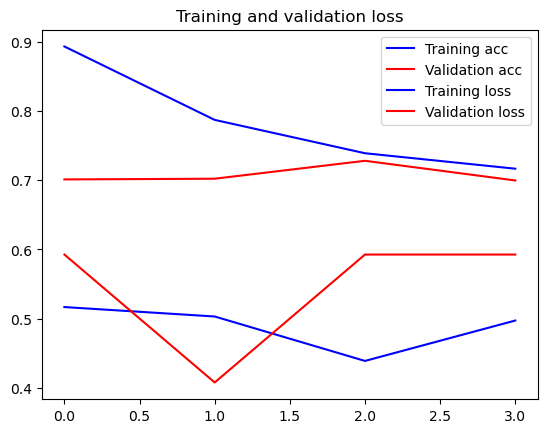

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [55]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [56]:
pred = network.predict(test_data)

6/6 [==============================] - 0s 16ms/step


In [57]:
pred

array([[0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

## Using SIGMOID Activation Function

In [59]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()


Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_27 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_28 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_15 (Functional)          (None, 128)          5328800     ['input_27[0][0]',               
                                                                  'input_28[0][0]']        

In [60]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np
import binascii
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)


# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='sigmoid'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='sigmoid'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'sigmoid'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

@tf.function
def hamming_distance(vectors):
    (featsA, featsB) = vectors
    return K.sum(K.abs(featsA - featsB), axis=1, keepdims=True)

# define the output layer
distance = Lambda(hamming_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="relu")(distance)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)


Epoch 1/10


/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


5/5 [==============================] - 1s 104ms/step - loss: 9.0622 - accuracy: 0.4125 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 2/10
5/5 [==============================] - 0s 90ms/step - loss: 9.0622 - accuracy: 0.4125 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 3/10
5/5 [==============================] - 0s 90ms/step - loss: 9.0622 - accuracy: 0.4125 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 4/10
5/5 [==============================] - 0s 91ms/step - loss: 9.0622 - accuracy: 0.4125 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 5/10
5/5 [==============================] - 0s 101ms/step - loss: 9.0622 - accuracy: 0.4125 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 6/10
5/5 [==============================] - 0s 92ms/step - loss: 9.0622 - accuracy: 0.4125 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 7/10
5/5 [==============================] - 0s 91ms/step - loss: 9.0622 - accuracy: 0.4125 - val_loss: 8.4837 - val_accuracy: 0.4500
Epoch 8/10
5/5 [====================

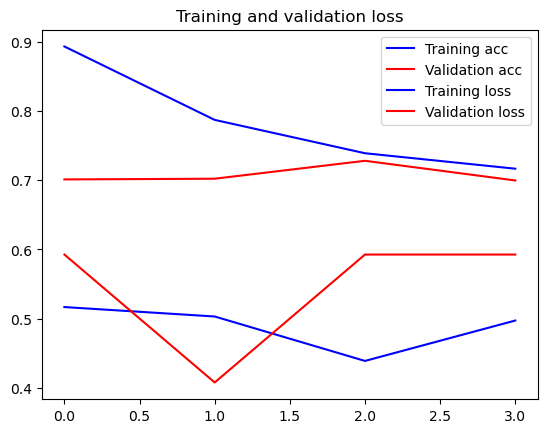

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [61]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [62]:
pred = network.predict(test_data)

6/6 [==============================] - 0s 16ms/step


In [63]:
pred

array([[0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

## **4. Using Minkowski Distance**

## Using RELU Activation Function

In [65]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()


Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_32 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_33 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_18 (Functional)          (None, 128)          5328800     ['input_32[0][0]',               
                                                                  'input_33[0][0]']        

In [66]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np

# Define the input shape for the network
input_shape = (224, 224, 3)

# Define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

# Define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='relu'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'relu'))
convnet.add(Dropout(rate=0.3))

# Create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# Define the distance metric function using Minkowski distance
def minkowski_distance(vectors):
    (featsA, featsB) = vectors
    diff = K.abs(featsA - featsB)
    return K.sum(K.pow(diff, 3), axis=-1, keepdims=True)

# Define the output layer
distance = Lambda(minkowski_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="relu")(distance)

# Create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# Train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)


Epoch 1/10


/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


5/5 [==============================] - 1s 109ms/step - loss: 7.9053 - accuracy: 0.4875 - val_loss: 10.0262 - val_accuracy: 0.3500
Epoch 2/10
5/5 [==============================] - 0s 89ms/step - loss: 7.9053 - accuracy: 0.4875 - val_loss: 10.0262 - val_accuracy: 0.3500
Epoch 3/10
5/5 [==============================] - 0s 92ms/step - loss: 7.9053 - accuracy: 0.4875 - val_loss: 10.0262 - val_accuracy: 0.3500
Epoch 4/10
5/5 [==============================] - 0s 91ms/step - loss: 7.9053 - accuracy: 0.4875 - val_loss: 10.0262 - val_accuracy: 0.3500
Epoch 5/10
5/5 [==============================] - 0s 90ms/step - loss: 7.9053 - accuracy: 0.4875 - val_loss: 10.0262 - val_accuracy: 0.3500
Epoch 6/10
5/5 [==============================] - 0s 87ms/step - loss: 7.9053 - accuracy: 0.4875 - val_loss: 10.0262 - val_accuracy: 0.3500
Epoch 7/10
5/5 [==============================] - 0s 87ms/step - loss: 7.9053 - accuracy: 0.4875 - val_loss: 10.0262 - val_accuracy: 0.3500
Epoch 8/10
5/5 [==============

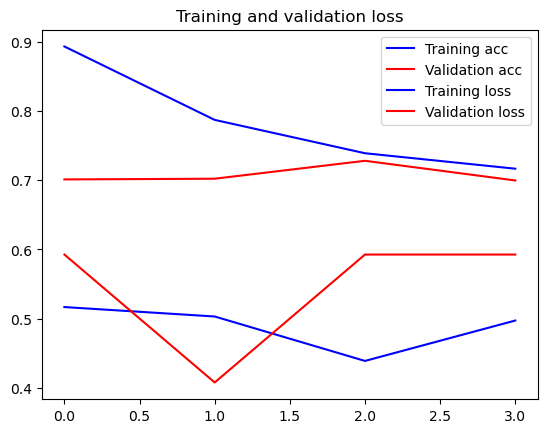

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [67]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [68]:
pred = network.predict(test_data)

6/6 [==============================] - 0s 16ms/step


In [69]:
pred

array([[0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.5576012 , 0.44239882],
       [0.

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5

# USING CEDAR DATASET

## CNN Model

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icdar2011signatureverification/sigComp2011-test.zip
/kaggle/input/icdar2011signatureverification/sigComp2011-trainingSet.zip
/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S-7-G-09.tif
/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S-7-F-16.tif
/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S-7-F-11.tif
/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S-7-F-10.tif
/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S-7-G-01.tif
/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S-7-F-09.tif
/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S-7-F-17.tif
/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S-7-G-17.tif
/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S-7-G-20.tif
/kaggle/input/handwritten-signatu

In [2]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Multiply, Subtract, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, Dropout, MaxPooling2D, GlobalMaxPooling2D
from keras.layers import Dense, Dropout, Input, Lambda, Flatten, Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import l2
from keras.models import Model, load_model, Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
# from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform, he_normal
import scipy.misc
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline
import keras.backend as K
K.set_image_data_format('channels_last') 
# K.set_learning_phase(1) 
import scipy
import cv2
from keras.layers import subtract
import keras
from keras.layers import Lambda
import tensorflow as tf 
from tensorflow.keras.optimizers import Adam,RMSprop   

In [4]:
from tensorflow import image
from tensorflow.keras.utils import *

In [5]:
from PIL import Image,ImageOps

In [6]:
SIZE=(220,155)

In [7]:
import os
img_path='../input/cedardataset/signatures/full_org/original_11_17.png'

In [8]:
def preprocess(img_input):
    img_input=cv2.resize(img_input,SIZE,interpolation=cv2.INTER_LINEAR )
#     img_input=cv2.bitwise_not(img_input)
    img_input=img_input/245
    return img_input

In [9]:
pip install keras-preprocessing


Note: you may need to restart the kernel to use updated packages.


In [10]:
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
img = load_img(img_path,target_size=(155,220)) 
x = img_to_array(img)
x=preprocess(x)

In [11]:
x.shape

(155, 220, 3)

In [12]:
from matplotlib.pyplot import imshow

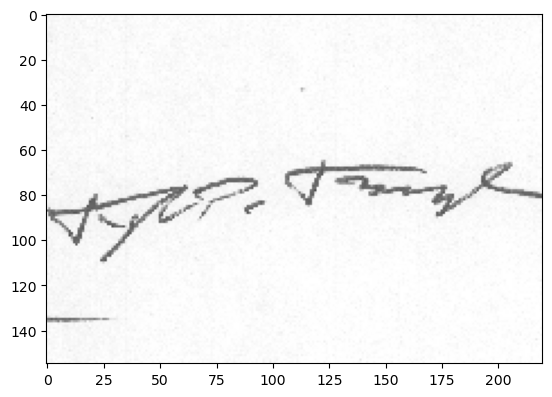

In [13]:
imshow(x)

In [14]:
import os
img_path='../input/cedardataset/signatures/full_org/original_11_17.png'

In [15]:
img = load_img(img_path,target_size=(155,220)) 
x = img_to_array(img)
x=preprocess(x)

In [16]:
x.shape

(155, 220, 3)

In [17]:
from matplotlib.pyplot import imshow

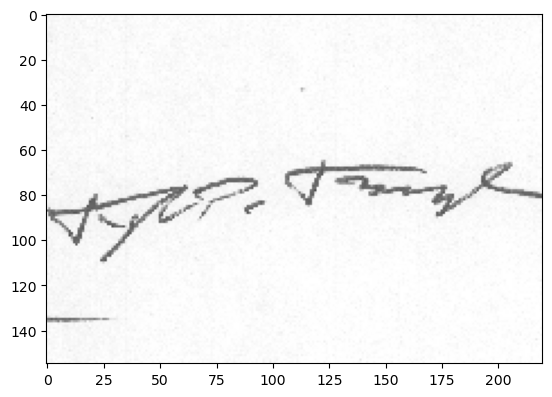

In [18]:
imshow(x)

In [19]:
def euclidian(vects):
    X,y=vects
    return K.sqrt(K.sum(K.square(X-y),axis=1,keepdims=True))

def euclidean_distance_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [20]:
def contrastive_loss(y, preds, margin=1):
	# explicitly cast the true class label data type to the predicted
	# class label data type (otherwise we run the risk of having two
	# separate data types, causing TensorFlow to error out)
	y = tf.cast(y, preds.dtype)
	# calculate the contrastive loss between the true labels and
	# the predicted labels
	squaredPreds = K.square(preds)
	squaredMargin = K.square(K.maximum(margin - preds, 0))
	loss = K.mean(y * squaredPreds + (1 - y) * squaredMargin)
	# return the computed contrastive loss to the calling function
	return loss

In [21]:
input_shape=(155,230,3)

In [22]:
def siamese(input_shape):
    model=Sequential()
    model.add(Conv2D(96, (11,11), activation='relu', name='conv11',input_shape=input_shape))
    model.add(BatchNormalization(epsilon=1e-06,  axis=1, momentum=0.9))
    model.add(MaxPooling2D((3,3), strides=(2, 2),padding='same'))    


    model.add(Conv2D(256, (5,5), activation='relu', name='conv12'))
    model.add(BatchNormalization(epsilon=1e-06,  axis=1, momentum=0.9))
    model.add(MaxPooling2D((3,3), strides=(2, 2),padding='same'))    
    model.add(Dropout(0.3))

    model.add(Conv2D(384, (3,3), activation='relu', name='conv13',input_shape=input_shape,padding='same'))
    model.add(Conv2D(256, (3,3), activation='relu', name='conv14'))
    model.add(MaxPooling2D((3,3), strides=(2, 2),padding='same'))
    model.add(Flatten())
    model.add(Dense(1024, kernel_regularizer=l2(0.0005), activation='relu', kernel_initializer=glorot_uniform(seed=0)))
    model.add(Dropout(0.3))
    model.add(Dense(128, kernel_regularizer=l2(0.0005), activation='relu', kernel_initializer=glorot_uniform(seed=0)))
    return model

In [24]:
apply_sigmodel = siamese((155,220,3))
    
X_input1 = Input(shape=(155,220,3))
X_input2 = Input(shape=(155,220,3)) 

X_vect1 = apply_sigmodel(X_input1)
X_vect2 = apply_sigmodel(X_input2)
    
distance = Lambda(euclidian, output_shape=euclidean_distance_output_shape)([X_vect1,X_vect2])
    
model = Model(inputs=[X_input1,X_input2], outputs=distance)  

In [25]:
rms = RMSprop(learning_rate=1e-4, rho=0.9, epsilon=1e-08)

In [26]:
model.compile(loss=contrastive_loss,optimizer=rms,metrics=['accuracy'])

In [27]:
forg_list_1=[]
for i in range(20):
    p=[]
    for j in range(24):
        img_path = '../input/cedardataset/signatures/full_forg/forgeries_'+str(i+1) +'_' +str(j+1)+'.png'
        img = load_img(img_path,target_size=(155,220)) 
        x = img_to_array(img)
        x=preprocess(x)
        p.append(x)
    forg_list_1.append(p)

In [28]:
org_list_1=[]
for i in range(20):
    p=[]
    for j in range(24):
        img_path = '../input/cedardataset/signatures/full_org/original_'+str(i+1) +'_' +str(j+1)+'.png'
        img = load_img(img_path,target_size=(155,220)) 
        x = img_to_array(img)
        x=preprocess(x)
        p.append(x)
    org_list_1.append(p)

In [29]:
X_train1=[]
X_train2=[]
for i in range(10):
    count=24
    while(count>1):
        for j in range(0,count-1):
            X_train1.append(org_list_1[i][24-count])
            X_train2.append(org_list_1[i][24-count+j+1])
        count=count-1
       
for i in range(10):
    count=24
    while(count>1):
        for j in range(0,count-1):
            X_train1.append(org_list_1[i][24-count])
            X_train2.append(forg_list_1[i][24-count+j+1])
        count=count-1

In [30]:
len(X_train1)

5520

In [31]:
X_train1=np.asarray(X_train1)
X_train2=np.asarray(X_train2)    

In [32]:
Y_train=np.array([])
for m in range(2760):
    Y_train=np.insert(Y_train,0,1)
for n in range(2760):
    Y_train=np.insert(Y_train,0,0)   

In [33]:
model.fit([X_train1,X_train2], Y_train, epochs = 5, batch_size = 10)      

Epoch 1/5


2023-03-14 09:39:05.747458: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/sequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


552/552 [==============================] - 74s 118ms/step - loss: 2.8801 - accuracy: 0.5152
Epoch 2/5
552/552 [==============================] - 65s 118ms/step - loss: 0.6333 - accuracy: 0.5045
Epoch 3/5
552/552 [==============================] - 65s 117ms/step - loss: 0.3963 - accuracy: 0.4920
Epoch 4/5
552/552 [==============================] - 65s 118ms/step - loss: 0.2601 - accuracy: 0.3176
Epoch 5/5
552/552 [==============================] - 65s 117ms/step - loss: 0.1732 - accuracy: 0.1942


In [34]:
import h5py
model.save_weights('model_weights33.h5') 

In [35]:
del X_train1, X_train2

In [ ]:
img_1=load_img('../input/cedardataset/signatures/full_forg/forgeries_20_10.png',target_size=(155,220)) 
x = img_to_array(img_1)
x=preprocess(x)
l1=[x]
# l2=[x2]
l1=np.asarray(l1)
# l2=np.asarray(l2)

In [36]:
l1=[x]
# l2=[x2]
l1=np.asarray(l1)

In [37]:
img_1=load_img('../input/cedardataset/signatures/full_org/original_20_10.png',target_size=(155,220)) 
x = img_to_array(img_1)
x=preprocess(x)

In [38]:
l2=[x]
l2=np.asarray(l2)

In [39]:
pred=model.predict([l1,l2])

1/1 [==============================] - 1s 852ms/step


In [40]:
pred

array([[0.01204347]], dtype=float32)

In [41]:
from sklearn.metrics import accuracy_score

# get predictions on test data
pred = model.predict([l1, l2])
pred = pred.reshape(-1)  # flatten to a 1D array

# convert distances to similarities
similarity = 1/(1+pred)

# set a threshold to convert similarities to class predictions
threshold = 0.5
predictions = (similarity > threshold).astype(int)

# calculate accuracy
y_true = [1]  # replace with the actual labels of the samples
accuracy = accuracy_score(y_true, predictions)
print('Accuracy:', accuracy)

1/1 [==============================] - 0s 35ms/step
Accuracy: 1.0
